In [86]:
# Upload .csv file in google colab
from google.colab import files

uploaded = files.upload()

Saving employee_churn_data.csv to employee_churn_data (3).csv


In [87]:
# Import all dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
#  Import and read the csv into a DataFrame
import pandas as pd
employees_df = pd.read_csv("employee_churn_data.csv")
employees_df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


>Preprocessing data

In [89]:
# Check data types and null values
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [90]:
# Determine the number of unique values in each column
employees_df_unique = employees_df.nunique()
employees_df_unique

department         10
promoted            2
review           9540
projects            4
salary              3
tenure             11
satisfaction     9540
bonus               2
avg_hrs_month    9540
left                2
dtype: int64

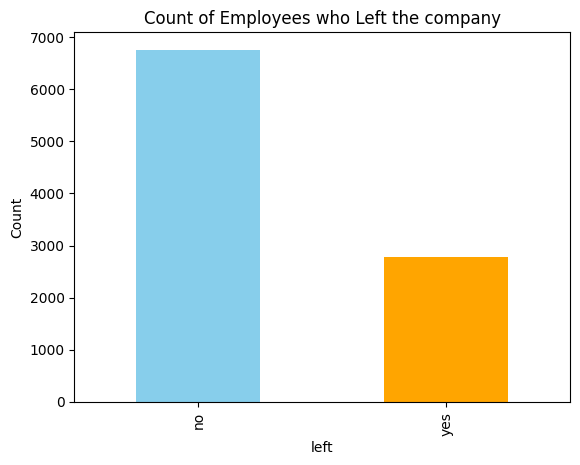

In [91]:
# Check number of employees turnover
left_counts = employees_df['left'].value_counts()
left_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Plot bar graph
plt.title('Count of Employees who Left the company')
plt.ylabel('Count')
plt.show()

# > `Model Initialization`

In [92]:
# Convert categorical data to numeric with `pd.get_dummies`

# Add.astype(int) to switch boolean variables (True/False) to integers
employees_df_dummies = pd.get_dummies(employees_df).astype(int)
employees_df_dummies


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,...,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium,left_no,left_yes
0,0,0,3,5,0,0,180,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,3,6,0,0,182,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,0,3,6,0,0,184,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,4,8,0,0,188,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,3,5,0,1,179,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,0,4,8,0,0,188,0,0,0,...,0,1,0,0,0,0,0,1,0,1
9536,0,0,3,8,0,0,188,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9537,0,0,3,7,0,0,186,0,0,0,...,0,1,0,0,0,0,1,0,0,1
9538,0,0,4,8,0,1,187,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [93]:
# Dropping duplicate column(s)
employees_df_dropped = employees_df_dummies.drop(['left_no'], axis =1)
employees_df_dropped

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,...,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium,left_yes
0,0,0,3,5,0,0,180,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,3,6,0,0,182,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,3,6,0,0,184,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,4,8,0,0,188,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,3,5,0,1,179,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,0,4,8,0,0,188,0,0,0,...,0,0,1,0,0,0,0,0,1,1
9536,0,0,3,8,0,0,188,0,0,0,...,1,0,0,0,0,0,0,0,1,1
9537,0,0,3,7,0,0,186,0,0,0,...,0,0,1,0,0,0,0,1,0,1
9538,0,0,4,8,0,1,187,1,0,0,...,0,0,0,0,0,0,0,0,1,1


> Split Train/Test

In [94]:
# # Split our data into features(X) and target variable(y)
y = employees_df_dropped ["left_yes"].values
X = employees_df_dropped.drop(columns="left_yes").values

# Split our data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train.shape


(7155, 20)

In [95]:
X_test.shape

(2385, 20)

In [96]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

>Compile, Train Model with training dataset, Evaluate Model with testing dataset

In [97]:
# Define the neural network model

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="relu", input_dim=len(X_train[0])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                840       
                                                                 
 dense_13 (Dense)            (None, 20)                820       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1681 (6.57 KB)
Trainable params: 1681 (6.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [99]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
224/224 [==============================] - 1s 2ms/step - loss: 0.6188 - accuracy: 0.6904
Epoch 2/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7078
Epoch 3/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5899 - accuracy: 0.7079
Epoch 4/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7079
Epoch 5/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7089
Epoch 6/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7093
Epoch 7/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7096
Epoch 8/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7115
Epoch 9/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7143
Epoch 10/50
224/224 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7174

In [100]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

75/75 - 0s - loss: 0.5599 - accuracy: 0.7174 - 212ms/epoch - 3ms/step
Loss: 0.5598913431167603, Accuracy: 0.7174004316329956


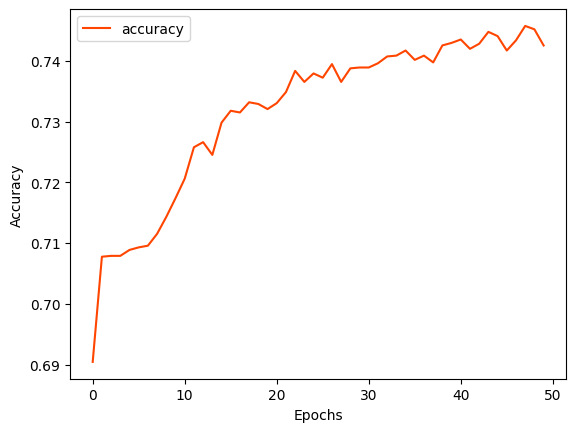

In [101]:
# Create a new DataFrame
history_df = pd.DataFrame(fit_model.history)

# Plot the accuracy
history_df.plot(y="accuracy", color="orangered")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

`RESULTS:`
*  Accuracy = 71%
*  Our trained model yields an accuracy score of 71% having retained all orginal features and their values. This score suggests that our model is not severely overfitting or underfitting the data, and is making predictions correctly about 71.8% of the time. But there is room for improvement. We will reexamine our datset for relevant features, and try different variations in designing the neural network in order to optimize our model further.



# > `Model Optimization`



>Correlation Matrix to re-examine features

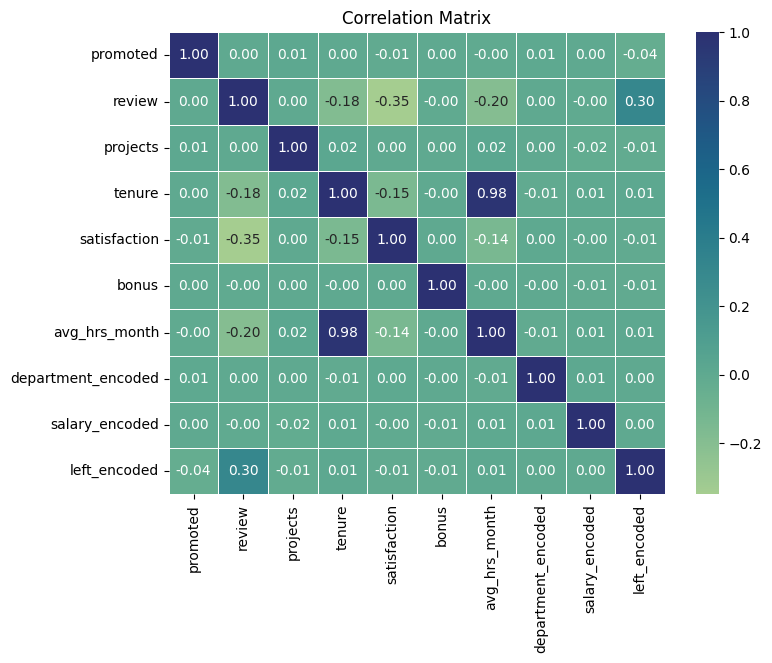

In [102]:
# Convert categorical features to numerical (only run once! otherwise clear all outputs and rerun)

# Assign a numerical value to each categorical feature instead
department_encoding = {'sales': 0, 'retail': 1, 'operations': 2, 'engineering': 3, 'marketing': 4, 'support': 5, 'admin': 6, 'finance': 7, 'logistics': 8, 'IT': 9}
salary_encoding = {'low': 0, 'medium': 1, 'high': 2}
left_encoding = {'no': 0, 'yes': 1}

# Encoded
employees_df['department_encoded'] = employees_df['department'].map(department_encoding).astype(int)
employees_df['salary_encoded'] = employees_df['salary'].map(salary_encoding).astype(int)
employees_df['left_encoded'] = employees_df['left'].map(left_encoding).astype(int)

# Drop the original categorical columns
employees_df.drop(['department', 'salary', 'left'], axis=1, inplace=True)

# Keep only numeric columns
numeric_df = employees_df.select_dtypes(include=['float64', 'int64'])

# Display correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Based on Correlation Matrix, we observe these relationships:
1. 'left' and 'review' have a moderately positive correlation;
2. 'left' and 'promoted'/'projects'/'satisfaction'/'bonus' have weakly negative correlations;
3. 'tenure' and 'avg_hrs_month' have strongly positive correlation themselves;
4. 'department' and 'salary' have no correlation to 'left'.

Let's explore each one more closely:

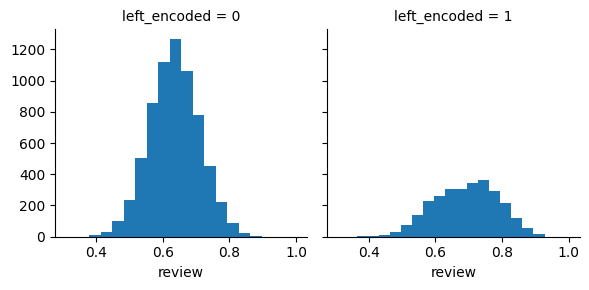

In [103]:
#1.'left' and 'review' have a moderately positive correlation:
# means there is some tendency for the number of employees who left to increase as the reviews become more positive, possibly for better opportunities.
g = sns.FacetGrid(numeric_df, col='left_encoded')
g.map(plt.hist, 'review', bins=20)

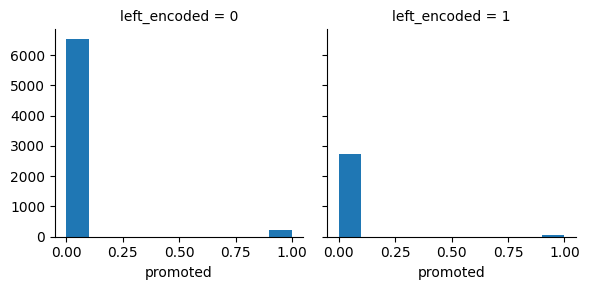

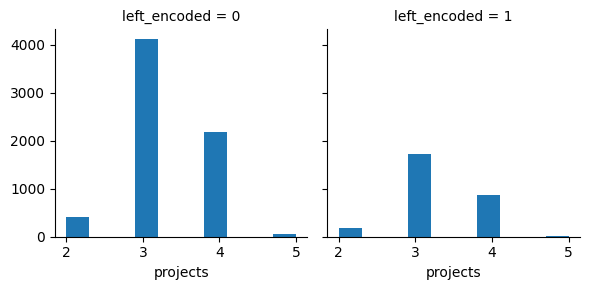

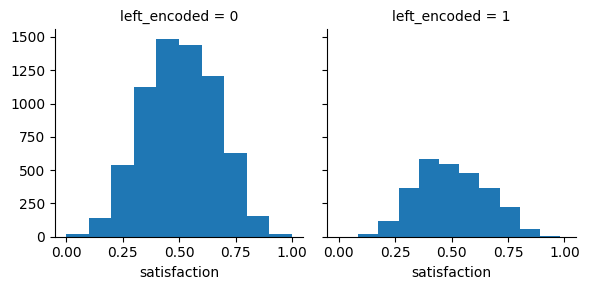

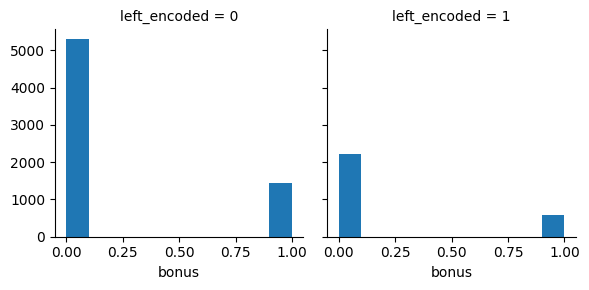

In [104]:
#2. 'left' and 'promoted'/'projects'/'satisfaction'/'bonus' have negative correlations:
# means changes in any one of these factors are not largely associated with consistent changes in the number of employees who left the company.
columns_to_plot = ['promoted', 'projects', 'satisfaction',	'bonus']

# Create loop to go through 4 feature columns
for column in columns_to_plot:
    g = sns.FacetGrid(numeric_df, col='left_encoded')
    g.map(plt.hist, column, bins=10)

plt.show()

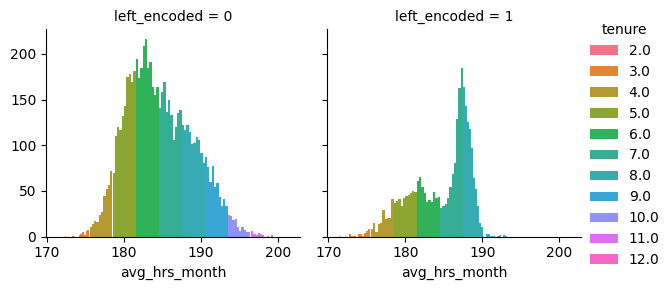

In [105]:
#3. 'tenure' and 'avg_hrs_month' have strongly positive correlation:
# means that employees who have both left or stayed with the company for a longer time, between 4.0-9.0 years, tend to work more hours per month on average, or vice versa.
# Keep these columns in our data.

g = sns.FacetGrid(numeric_df, col='left_encoded', hue='tenure')
g.map(plt.hist, 'avg_hrs_month', bins=10)
g.add_legend()

plt.show()


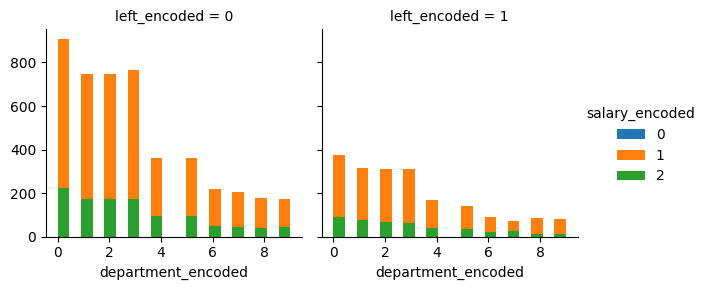

In [106]:
#4. 'department' and 'salary' have no correlation to 'left':
# means neither the department in which an employee works nor their salary level has a significant impact on whether they left the company. Let's consider dropping these two columns.

g = sns.FacetGrid(numeric_df, col='left_encoded', hue='salary_encoded')
g.map(plt.hist, 'department_encoded', bins=20)
g.add_legend()

plt.show()

In [107]:
# Dropping non-essential columns
employees_df_cleaned = numeric_df.drop(['department_encoded', 'salary_encoded'], axis =1)
employees_df_cleaned

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left_encoded
0,0,0.577569,3,5.0,0.626759,0,180.866070,0
1,0,0.751900,3,6.0,0.443679,0,182.708149,0
2,0,0.722548,3,6.0,0.446823,0,184.416084,0
3,0,0.675158,4,8.0,0.440139,0,188.707545,0
4,0,0.676203,3,5.0,0.577607,1,179.821083,0
...,...,...,...,...,...,...,...,...
9535,0,0.610988,4,8.0,0.543641,0,188.155738,1
9536,0,0.746887,3,8.0,0.549048,0,188.176164,1
9537,0,0.557980,3,7.0,0.705425,0,186.531008,1
9538,0,0.584446,4,8.0,0.607287,1,187.641370,1


> Split Train/Test

In [108]:
# Split our data into features(X) and target variable(y)
y = employees_df_cleaned ["left_encoded"].values
X = employees_df_cleaned.drop(columns="left_encoded").values

# Split our data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train.shape


(7155, 7)

In [109]:
X_test.shape

(2385, 7)

In [110]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Compile, Train Model with training dataset, Evaluate Model with testing dataset (cleaned)

In [111]:
# Define the neural network model

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=14, activation="relu", input_dim=len(X_train[0])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 14)                112       
                                                                 
 dense_16 (Dense)            (None, 7)                 105       
                                                                 
 dense_17 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [113]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
224/224 [==============================] - 2s 3ms/step - loss: 0.5741 - accuracy: 0.7400
Epoch 2/50
224/224 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7553
Epoch 3/50
224/224 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7530
Epoch 4/50
224/224 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7711
Epoch 5/50
224/224 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7955
Epoch 6/50
224/224 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8078
Epoch 7/50
224/224 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8189
Epoch 8/50
224/224 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8280
Epoch 9/50
224/224 [==============================] - 1s 5ms/step - loss: 0.3877 - accuracy: 0.8377
Epoch 10/50
224/224 [==============================] - 1s 5ms/step - loss: 0.3775 - accuracy: 0.8404

In [114]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

75/75 - 0s - loss: 0.2956 - accuracy: 0.8679 - 218ms/epoch - 3ms/step
Loss: 0.29557913541793823, Accuracy: 0.8679245114326477


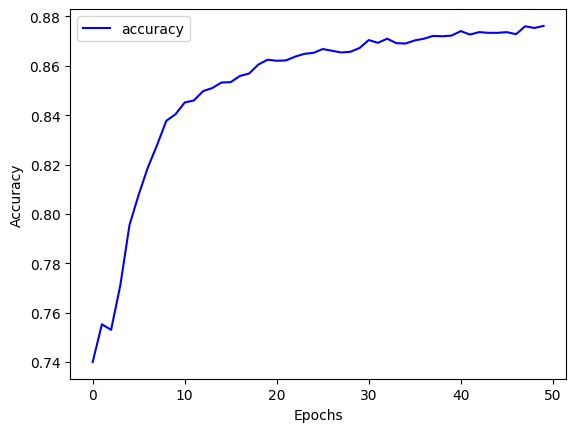

In [115]:
# Create a new DataFrame
history_df = pd.DataFrame(fit_model.history)

# Plot the accuracy
history_df.plot(y="accuracy", color="blue")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

`RESULTS 2:`

*   Accuarcy = 87%

Before finalizing the optimization method above, the following additional attempts were made to improve the model (unsuccessfully):  

1.   Classification and binning of features such as-
- "review" with cutoff_value = 0.500000, yieliding accuracy=86%;
- "tenure" with cutoff_value = 500 or 4.0 years, yielding accuracy=86%

2. increasing number of neurons to 50/30/1; adding one more hidden layer; activation functions "tanh", yielding accuracy=86%

3. switching to "LeakyReLu"; dropout(0.2), yielding accuracy=84%

In conclusion, dropping "department" and "salary" features proved most effective at enhancing our model performance in predicting future employee turnover.
